<a href="https://colab.research.google.com/github/ManelGH1167/prueba/blob/main/08MIAR_dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
* Alumno 1: Benali, Abdelilah
* Alumno 2: Cuesta Cifuentes, Jair
* Alumno 3: González Huete, Manel
* Alumno 4: Manzanas Mogrovejo, Francisco
* Alumno 5: Pascual, Guadalupe

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.




---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [2]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive


ValueError: mount failed

---
### 1.4. Instalar librerías necesarias


In [3]:
IN_LOCAL = True

if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
if not IN_LOCAL:
  %pip install numpy==1.23.5
  %pip install gym==0.17
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.4.3
  %pip install tqdm

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-y2de4m7e
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-y2de4m7e
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement tensorflow==2.8 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.8


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [24]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc       # Para garbage collection
import random
import os
import pickle
import re       # Para expresiones regulares en carga de checkpoints
import gym      # Para el entorno de Atari
import cv2     # Para preprocesamiento de imágenes si se usa AtariProcessor
import warnings
import time
import psutil
import tracemalloc
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent, AbstractDQNAgent

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.layers import Lambda, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
from collections import deque
from tqdm import trange     # Necesaria para la barra de progreso en simple_train
import tensorflow.keras.backend as K

In [5]:
# Necesario para la grabación de video
try:
    import gym.wrappers
except ImportError:
    print("WARNING: gym.wrappers no está disponible. La grabación de video no funcionará.")
    gym.wrappers = None # Asegurar que no dé error si no se encuentra


In [6]:
# Configurar TensorFlow para CPU (14 cores)
os.environ["OMP_NUM_THREADS"] = "8"
os.environ["OPENBLAS_NUM_THREADS"] = "8"
os.environ["MKL_NUM_THREADS"] = "8"

# Ajuste recomendado (seguro y eficiente)
tf.config.threading.set_intra_op_parallelism_threads(8)   # dentro de cada operación
tf.config.threading.set_inter_op_parallelism_threads(4)   # entre operaciones
# Limpiar cualquier sesión previa
tf.keras.backend.clear_session()
print("Configurando TensorFlow para evitar fugas de memoria...")

# Forzar modo eager (crucial)
tf.config.run_functions_eagerly(True)

Configurando TensorFlow para evitar fugas de memoria...


#### Crear el entorno
Nuestro entorno es el juego Space Invaders, de Atari

In [7]:
# Crear el entorno
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [8]:
print("El tamaño de nuestro 'frame' es: ", env.observation_space)
print("El número de acciones posibles es : ", nb_actions)
print("Las acciones posibles son : ",env.env.get_action_meanings())

# Here we create an hot encoded version of our actions
# possible_actions = [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]...]
possible_actions = np.array(np.identity(env.action_space.n,dtype=int).tolist())
print("\nOHE de las acciones posibles: \n", possible_actions)

El tamaño de nuestro 'frame' es:  Box(0, 255, (210, 160, 3), uint8)
El número de acciones posibles es :  6
Las acciones posibles son :  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

OHE de las acciones posibles: 
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


#### Definición Hiperparámetros

In [9]:
### HIPERPARÁMETROS DEL MODELO

### HIPERPARÁMETROS DE PREPROCESAMIENTO
USE_FRAMESTACK = True  # Cambiar a True si quieres detección de movimiento
WINDOW_LENGTH = 3 if USE_FRAMESTACK else 1   # Número de fotogramas apilados

# Definir shape consistente
if USE_FRAMESTACK:
    state_shape = (84, 84, WINDOW_LENGTH)  # (84, 84, x)
else:
    state_shape = (84, 84, 1)  # (84, 84, 1) - escala de grises simple

INPUT_SHAPE = (84, 84)
state_size = [84, 84, 3]          # Nuestra entrada es una pila de 4 fotogramas, por lo tanto 110x84x4 (ancho, alto, canales)
action_size = env.action_space.n  # 6 acciones posibles
learning_rate =  0.00025          # Alfa (también conocido como tasa de aprendizaje)

### HIPERPARÁMETROS DE ENTRENAMIENTO
# total_episodios = 10    #TEST        # Episodios totales para el entrenamiento
# max_steps = 10000       #TEST        # Máximo de pasos posibles por episodio
total_episodios = 100          # Episodios totales para el entrenamiento
max_steps = 3000               # Máximo de pasos posibles por episodio
batch_size = 32                # Tamaño del lote (batch)

# Parámetros de exploración para la estrategia epsilon-greedy
epsilon_start = 1.0            # Probabilidad de exploración al inicio
epsilon_stop = 0.01            # Probabilidad mínima de exploración
decay_rate = 0.00001           # Tasa de decaimiento exponencial para la probabilidad de exploración
epsilon_decay = 0.995

# Hiperparámetros del aprendizaje Q
gamma = 0.95                   # Tasa de descuento
tau = 0.001
checkpoint_path="checkpoints"

### HIPERPARÁMETROS DE MEMORIA
pretrain_length = batch_size   # Número de experiencias almacenadas en la memoria al inicializar por primera vez
memory_size = 5000             # Número de experiencias que la memoria puede guardar

### CAMBIA ESTO A FALSE SI SOLO QUIERES VER AL AGENTE ENTRENADO
training = False

## CAMBIA ESTO A TRUE SI QUIERES RENDERIZAR EL ENTORNO
episode_render = False

#### Clase "processor" para Atari

Ahora definimos un "processor" para las pantallas de entrada del juego, en el que recortamos el tamaño de la imagen (matriz de 210 x 160 píxeles) y la convertimos En una matriz bidimensional de 80 x 80 píxeles). También convertimos las imágenes de RGB a escala de grises normal, ya que no necesitamos usar los colores. Con este trabajo buscamos acelerar nuestro algoritmo, eliminando la información innecesaria y reduciendo la carga de la GPU.

In [30]:
class AtariProcessor(Processor):
    """
    Procesador para preprocesar observaciones del entorno Atari (e.g., SpaceInvaders-v0).

    Hereda de rl.core.Processor y proporciona métodos para convertir observaciones RGB en
    imágenes en escala de grises, redimensionarlas y normalizarlas, así como para limitar
    las recompensas.

    MÉTODOS:
    --------
        process_observation(observation): Convierte una observación RGB a escala de grises
                                         y la redimensiona.
        process_state_batch(batch): Normaliza un lote de estados dividiendo por 255.
        process_reward(reward): Limita las recompensas a un rango [-1, 1].
    """
    def process_observation(self, observation):
        """
        Preprocesa una observación convirtiéndola a escala de grises y redimensionándola.

        Parámetros:
        -----------
            observation (np.ndarray): Observación cruda del entorno con forma (height, width, channels).

        Retorna:
        --------
            np.ndarray: Imagen en escala de grises redimensionada a INPUT_SHAPE (84, 84) en formato uint8.

        Raises:
            AssertionError: Si la observación no tiene 3 dimensiones o la forma procesada no coincide con INPUT_SHAPE.
        """
        assert observation.ndim == 3  # (height, width, channel)
        # Crop the screen (remove the part below the player)
        # [Up: Down, Left: right]
        cropped_img = observation[18:-12, 4:-12]
        img = Image.fromarray(cropped_img)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        return np.clip(reward, -1., 1.)

    def process_step(self, observation, reward, done, info):
        """
        Procesa un paso completo del entorno.
        """
        processed_observation = self.process_observation(observation)
        processed_reward = self.process_reward(reward)
        return processed_observation, processed_reward, done, info

#### Revisar el entorno de juego

In [11]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [12]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

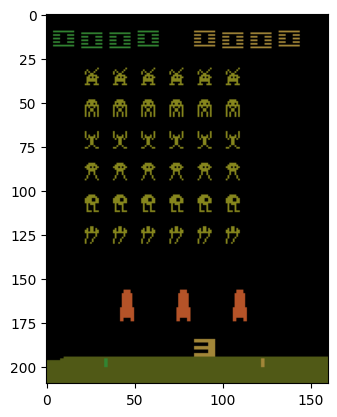

In [13]:
observation = env.reset()
for i in range(22):
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, reward, done, info = env.step(1)

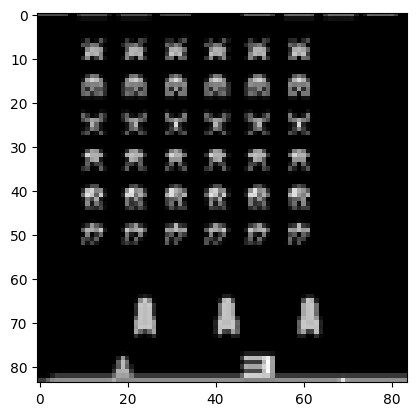

(210, 160, 3)
(84, 84)


In [14]:
# Mostrar las entradas preprocesadas en escala de grises y comparar originales y preprocesados.
processor = AtariProcessor()
obs_preprocessed = processor.process_observation(observation).reshape(INPUT_SHAPE)
# Seleccionamos el primer frame y lo normalizamos
frame = processor.process_state_batch(obs_preprocessed)
# Visualizar en escala de grises
plt.imshow(frame, cmap='gray')
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

#### Clase FrameStack para apilar frames

In [15]:
class FrameStack:
    """
    Clase para gestionar una pila de fotogramas consecutivos del entorno, utilizada para capturar
    el contexto temporal en juegos de Atari (e.g., SpaceInvaders-v0).

    Mantiene una cola (deque) de fotogramas preprocesados con un tamaño máximo definido por
    max_length, apilándolos para formar un estado con información de movimiento.

    Atributos:
    ----------
        frames (deque): Cola de fotogramas preprocesados con longitud máxima max_length.
        max_length (int): Número máximo de fotogramas a apilar (e.g., WINDOW_LENGTH).

    MÉTODOS:
    --------
        append(frame): Añade un nuevo fotograma a la pila, eliminando el más antiguo si es necesario.
        get_stacked_state(): Devuelve el estado apilado como un array NumPy.
    """
    def __init__(self, num_frames=4):
        """
        Inicializa la pila de fotogramas.

        Parámetros:
        -----------
            max_length (int): Número máximo de fotogramas a mantener en la pila.
        """
        self.num_frames = num_frames
        self.frames = deque([np.zeros((INPUT_SHAPE), dtype=np.int) for i in range(self.num_frames)], maxlen=self.num_frames)

    def reset(self):
        self.frames.clear()

    def add_frame(self, frame, is_new_episode):
        """
        Añade un fotograma preprocesado a la pila.

        Parámetros:
        -----------
            frame (np.ndarray): Fotograma preprocesado (e.g., imagen en escala de grises de 84x84).
        """
        # Si es el primer frame, llenamos el deque
        if is_new_episode:
            self.frames = deque([np.zeros((INPUT_SHAPE), dtype=np.int) for i in range(self.num_frames)], maxlen=self.num_frames)
            for _ in range(self.num_frames):
                self.frames.append(frame)
        else:
            self.frames.append(frame)

    def get_state(self):
        """
        Devuelve el estado apilado como un array NumPy con los fotogramas actuales.

        Si la pila no está llena, repite el último fotograma hasta completar max_length.

        Retorna:
        --------
            np.ndarray: Array de forma (84, 84, max_length) con los fotogramas apilados.
        """
        # Convertir a array con shape (84, 84, 4)
        return np.stack(self.frames, axis=-1)

#### Clase ReplayMemory

In [16]:
class ReplayMemory:
    """ReplayMemory optimizada para evitar fugas de memoria"""

    def __init__(self, capacity, state_shape):
        self.capacity = capacity
        self.position = 0
        self.size = 0

        # Pre-asignar arrays con el tamaño exacto
        # Usar uint8 para estados (más eficiente que float32)
        self.states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.actions = np.zeros(capacity, dtype=np.int32)
        self.rewards = np.zeros(capacity, dtype=np.float32)
        self.next_states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.dones = np.zeros(capacity, dtype=np.bool_)

        print(f"ReplayMemory creada: {capacity} samples, {state_shape} shape")
        memory_size = (
            self.states.nbytes + self.next_states.nbytes +
            self.actions.nbytes + self.rewards.nbytes + self.dones.nbytes
        ) / (1024 * 1024)
        print(f"Memoria asignada: {memory_size:.2f} MB")

    def append(self, state, action, reward, next_state, done):
        """Añade una experiencia al buffer de forma eficiente"""
        # Convertir a uint8 para ahorrar memoria (estados son imágenes 0-255)
        if state.dtype != np.uint8:
            state = (state * 255).astype(np.uint8)
        if next_state.dtype != np.uint8:
            next_state = (next_state * 255).astype(np.uint8)

        # Almacenar directamente en el array pre-asignado
        self.states[self.position] = state
        self.actions[self.position] = action
        self.rewards[self.position] = reward
        self.next_states[self.position] = next_state
        self.dones[self.position] = done

        # Actualizar posición circular
        self.position = (self.position + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)

    def sample(self, batch_size):
        """Muestra un batch de experiencias de forma eficiente"""
        if self.size < batch_size:
            raise ValueError(f"No hay suficientes samples ({self.size}) para batch_size ({batch_size})")

        # Generar índices aleatorios
        indices = np.random.choice(self.size, batch_size, replace=False)

        # Extraer batch y convertir de vuelta a float32 para el entrenamiento
        batch_states = self.states[indices].astype(np.float32) / 255.0
        batch_actions = self.actions[indices]
        batch_rewards = self.rewards[indices]
        batch_next_states = self.next_states[indices].astype(np.float32) / 255.0
        batch_dones = self.dones[indices]

        return batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones

    def __len__(self):
        return self.size

    def clear(self):
        """Limpia la memoria de forma segura"""
        self.position = 0
        self.size = 0
        # No es necesario limpiar los arrays, se sobrescriben

#### Clase PerformanceMonitor

In [20]:
# Clase para monitoreo de memoria y rendimiento
class PerformanceMonitor(tf.keras.callbacks.Callback):
    def __init__(self, save_path='diagnosticos'):
        self.save_path = save_path
        self.episode_times = []
        self.memory_usage = []
        self.current_episode = 0
        self.episode_start_time = None
        self.episode_start_memory = None

    def on_episode_begin(self, episode, logs={}):
        self.episode_start_time = time.time()
        self.episode_start_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        self.current_episode = episode
        print(f"Episodio {episode} comenzando. Memoria inicial: {self.episode_start_memory:.2f} MB")

    def on_episode_end(self, episode, logs={}):
        end_time = time.time()
        final_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        episode_duration = end_time - self.episode_start_time

        self.episode_times.append(episode_duration)
        self.memory_usage.append(final_memory)

        print(f"Episodio {episode} completado en {episode_duration:.2f} segundos")
        print(f"Memoria final: {final_memory:.2f} MB (cambio: {final_memory - self.episode_start_memory:.2f} MB)")

        # Guardar diagnóstico cada 5 episodios
        if (episode + 1) % 5 == 0:
            self.save_diagnostics(episode)

        # Forzar recolección de basura
        gc.collect()

    def save_diagnostics(self, episode):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.episode_times)
        plt.title('Tiempo por episodio')
        plt.ylabel('Segundos')
        plt.xlabel('Episodio')

        plt.subplot(1, 2, 2)
        plt.plot(self.memory_usage)
        plt.title('Uso de memoria')
        plt.ylabel('MB')
        plt.xlabel('Episodio')

        plt.tight_layout()
        plt.savefig(f"{self.save_path}/rendimiento_episodio_{episode+1}.png")
        plt.close()

### 1. Implementación de la red neuronal

#### Definición de las redes neuronales

Crearemos una clase para construir un red Q-profunda, con tres capas convolucionales, seguidas de una capa de aplanamiento y una capa completamente conectada.

In [17]:
@tf.keras.utils.register_keras_serializable()
class DQNetwork(tf.keras.Model):
    """
    Red neuronal Deep Q-Network (DQN) para aproximar la función Q en aprendizaje por refuerzo.

    Esta clase implementa una red convolucional que recibe un estado (conjunto de frames)
    y produce los valores Q para cada acción posible. Usa capas convolucionales seguidas
    de capas totalmente conectadas, con activación ELU.

    Parámetros:
    -----------
    state_size : tupla/lista - Dimensiones del estado de entrada (por ejemplo, [84, 84, 4]).
    action_size : int        - Número de acciones posibles en el entorno.
    learning_rate : float    - Tasa de aprendizaje para el optimizador Adam.
    name : str, opcional     - Nombre del scope de TensorFlow para distinguir múltiples redes.
    """
    def __init__(self, state_size, action_size, learning_rate, name='DQNetwork'):
        super(DQNetwork, self).__init__(name=name)
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate

        with tf.name_scope(name):
            # Definir las capas
            if K.image_data_format() == 'channels_last':
                self.permute = Permute((2, 3, 1))
            elif K.image_data_format() == 'channels_first':
                self.permute = Permute((1, 2, 3))
            else:
                raise RuntimeError('Unknown image_dim_ordering.')

            self.conv1 = Conv2D(32, (8, 8), strides=(4, 4), activation='relu')
            self.conv2 = Conv2D(64, (4, 4), strides=(2, 2), activation='relu')
            self.conv3 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')
            self.flatten = Flatten()
            self.fc = Dense(512, activation='relu')
            self.output_layer = Dense(action_size, activation='linear')

            # Define loss function
            # Definir el optimizador
            self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
            self.loss_fn = tf.keras.losses.MeanSquaredError()

    def call(self, inputs):
        """
        Ejecuta la red neuronal para un batch de estados y define la lógica para hacer la propagación hacia adelante
        (forward pass).  Se llama automáticamente en una clase que hereda de tf.keras.Model o tf.keras.layers.Layer.

        Parámetros:
        -----------
        inputs : tf.Tensor  - Tensor con los estados de entrada, shape = (batch_size, *state_size)

        Retorna:
        --------
        tf.Tensor - Valores Q para cada acción, shape = (batch_size, action_size)
        """
        x = self.permute(inputs)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.output_layer(x)

    def get_config(self):
        return {
            'state_size': self.state_size,
            'action_size': self.action_size,
            'learning_rate': self.learning_rate,
            'name': self.name,
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
# Definición de DDQNetwork independiente
@tf.keras.utils.register_keras_serializable()
class DDQNetwork(tf.keras.Model):
    """
    Implementación de una red Double DQN para juegos de Atari.

    Esta arquitectura utiliza dos redes para reducir la sobreestimación de valores Q:
    - La red principal (main_network) para seleccionar acciones
    - La red objetivo (target_network) para calcular valores Q objetivo
    """
    def __init__(self, state_size=(84, 84, 4), action_size=6, learning_rate=0.00025, name='DDQNetwork'):
        super(DDQNetwork, self).__init__(name=name)
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate

        # Definir arquitectura de redes (main y target son idénticas en estructura)

        # Red principal - para selección de acciones
        self.main_network = self._build_network()

        # Red objetivo - para evaluación de valores Q
        self.target_network = self._build_network()

        # Inicialmente, ambas redes tienen los mismos pesos
        self.update_target(tau=1.0)

        # Optimizador
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

        # Función de pérdida
        self.loss_fn = tf.keras.losses.MeanSquaredError()

    def _build_network(self):
        """Construye la arquitectura de la red neuronal."""
        inputs = Input(shape=self.state_size)

        # Capas convolucionales
        x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid')(inputs)
        x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid')(x)
        x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid')(x)
        x = Flatten()(x)

        # Capas densas
        x = Dense(512, activation='relu')(x)
        outputs = Dense(self.action_size, activation='linear')(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs)
        return model

    def call(self, inputs, training=False):
        """
        Forward pass a través de la red principal.
        """
        return self.main_network(inputs, training=training)

    def update_target(self, tau=1.0):
        """
        Actualiza los pesos de la red objetivo.

        Args:
            tau: Factor de mezcla para actualización suave (1.0 = copia completa)
        """
        # Obtener pesos actuales
        main_weights = self.main_network.get_weights()
        target_weights = self.target_network.get_weights()

        # Actualización suave de los pesos
        updated_weights = []
        for i in range(len(target_weights)):
            updated_weights.append((1 - tau) * target_weights[i] + tau * main_weights[i])

        # Establecer nuevos pesos
        self.target_network.set_weights(updated_weights)

    def train_step_optimized(self, states, actions, target_q):
        """
        Realiza un paso de entrenamiento: calcula la pérdida y aplica gradientes.

        Parámetros:
        -----------
        states : tf.Tensor -    Batch de estados de entrada, shape = (batch_size, *state_size)
        actions : tf.Tensor -   Acciones tomadas, codificadas one-hot, shape = (batch_size, action_size)
        target_q : tf.Tensor -  Valores objetivo Q, shape = (batch_size,)

        Retorna:
        --------
        loss : tf.Tensor -      Valor de la pérdida calculada en este paso.
        """
        with tf.GradientTape() as tape:
            # Calculamos los valores Q para todos los estados y acciones usando la red principal
            q_values = self.main_network(states, training=True)

            # Obtenemos los valores Q para las acciones tomadas
            q_action = tf.reduce_sum(q_values * actions, axis=1)

            # target_q ya debe venir calculado con la red objetivo
            # Si target_q ya es (batch_size,), usamos directamente:
            target_q_action = target_q

            # Calculamos la pérdida MSE entre Q predicho y target_Q
            loss = self.loss_fn(target_q_action, q_action)

        # Calculamos los gradientes y actualizamos solo la red principal
        gradients = tape.gradient(loss, self.main_network.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.main_network.trainable_variables))

        return loss

    def get_config(self):
        """Método para serialización."""
        return {
            'state_size': self.state_size,
            'action_size': self.action_size,
            'learning_rate': self.learning_rate,
            'name': self.name
        }

    @classmethod
    def from_config(cls, config):
        """Método para deserialización."""
        return cls(**config)

### 2. Implementación de la solución DQN

#### Funciones auxiliares

In [18]:
# Mapear clases a prefijos
class_to_prefix = {
        DQNetwork: "DQN",
        DQNetwork: "DDQN" #,
    #    DDQNetworkWithReplay: "DDQN_Replay",
    #    DuelingDQNetworkWithReplay: "DuelingDQN_Replay"
}

In [26]:
# Step 2: Create a fixed version of the compute_q_values function
def fixed_compute_q_values(self, state):
    """Compute Q-values for a given state."""
    # Get batch Q-values
    q_values = self.compute_batch_q_values([state])

    # Convert TensorFlow tensor to NumPy if needed
    if isinstance(q_values, tf.Tensor):
        q_values = q_values.numpy()

    # Debug output
    print(f"Q-values shape: {q_values.shape}, nb_actions: {self.nb_actions}")

    # Flatten the Q-values - handle different shapes
    if len(q_values.shape) > 1:
        if q_values.shape[1] == self.nb_actions:
            q_values = tf.keras.backend.get_value( q_values[0])
        else:
            # If shape doesn't match expected, reshape to match nb_actions
            q_values = q_values.reshape(-1)[:self.nb_actions]

    # Make sure we have the right number of Q-values
    if len(q_values) != self.nb_actions:
        print(f"WARNING: Q-values shape {q_values.shape} doesn't match nb_actions {self.nb_actions}")
        # Pad or truncate to match nb_actions
        if len(q_values) < self.nb_actions:
            # Pad with zeros
            q_values = np.pad(q_values, (0, self.nb_actions - len(q_values)))
        else:
            # Truncate
            q_values = q_values[:self.nb_actions]

    return q_values

# Step 3: Create a fixed version of compute_batch_q_values
def fixed_compute_batch_q_values(self, state_batch):
    """Compute Q-values for a batch of states."""
    # Process state batch
    batch = self.process_state_batch(state_batch)

    # Print shape for debugging
    print(f"Processed batch shape: {batch.shape}")

    try:
        # Convert to tensor with correct dtype
        tensor_batch = tf.convert_to_tensor(batch, dtype=tf.float32)

        # Get Q-values using the model's call method directly
        q_values = self.model(tensor_batch, training=False)

        # Convert to NumPy if it's a tensor
        if isinstance(q_values, tf.Tensor):
            q_values = tf.keras.backend.get_value( q_values)

        return q_values
    except Exception as e:
        print(f"Error computing batch Q-values: {e}")
        # Return default Q-values as fallback
        return np.zeros((len(state_batch), self.nb_actions))


In [27]:
# Step 4: Apply our fixes to the DQN agent
DQNAgent.compute_q_values = fixed_compute_q_values
DQNAgent.compute_batch_q_values = fixed_compute_batch_q_values

#### **ENTRENAMIENTO** ***********

In [28]:
# Iniciar tracemalloc
tracemalloc.start()
# Suprimir advertencias
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Configurar TensorFlow
tf.config.run_functions_eagerly(True)

#state_size = (WINDOW_LENGTH,) + INPUT_SHAPE
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE  # e.g. (4, 84, 84)

def crear_agente(env, dqnet_class, processor, state_size, action_size, gamma, prefijo,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000):
    """
    Configura un agente DQN o DDQN con parámetros comunes.

    Parámetros:
    -----------
    dqnet_class: Clase del modelo (e.g., DQNetwork, DDQNetwork, DDQNetworkWithReplay, DuelingDQNetworkWithReplay).
            Se usa para verificar si el modelo soporta memoria de repetición y para determinar el prefijo de los
            nombres de archivo de checkpoint.
    env : gym.Env -        Entorno de OpenAI Gym
    input_shape : tuple -  Forma del estado de entrada (altura, ancho, canales)
    memoria_tamano : int - Tamaño de la memoria de experiencia
    warmup_steps : int -   Pasos antes de empezar a aprender
    target_update_interval : int - Frecuencia de actualización de la red objetivo
    target_update_tau : float - Factor de actualización suave para la red objetivo
    learning_rate : float -     Tasa de aprendizaje para el optimizador
    epsilon_start, epsilon_min, epsilon_steps : float, float, int - Parámetros para la política epsilon-greedy con decaimiento lineal

    Returns:
    --------
    agent : DQNAgent -       Agente configurado según los parámetros
    model : tf.keras.Model o DDQNetwork - Modelo usado por el agente
    processor : AtariProcessor -          Procesador de observaciones
    callbacks : list -                    Lista de callbacks configurados
    """
    # Limpiar cualquier grafo anterior
    gc.collect()

    # Verificar que el entorno esté disponible
    if env is None:
        raise ValueError("Debe proporcionar un entorno válido")

    # Paso condicional de memory_size solo para DDQNetworkWithReplay
    # if dqnet_class in [DDQNetworkWithReplay, DuelingDQNetworkWithReplay]:
    #     model_base = dqnet_class(state_size, action_size, learning_rate, memory_size=memory_size, tau=tau)
    # elif dqnet_class in [DDQNetwork]:  # si esta clase sí necesita tau
    #     model_base = dqnet_class(state_size, action_size, learning_rate, tau=tau, gamma=gamma)
    # else:
    model_base = dqnet_class(state_size, action_size, learning_rate)
    enable_double_dqn = False

    # Wrap funcional para Keras-RL
    dummy_input = tf.keras.Input(shape=input_shape)
    output = model_base(dummy_input)
    model = tf.keras.Model(inputs=dummy_input, outputs=output)
    model.summary()

    memory = SequentialMemory(limit=memoria_tamano, window_length=input_shape[2])

    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=epsilon_start, value_min=epsilon_min, value_test=.05,
                              nb_steps=epsilon_steps)
    # Crear agente
    dqn = DQNAgent(model=model,
                  nb_actions=nb_actions,
                  policy=policy,
                  memory=memory,
                  processor=processor,
                  nb_steps_warmup=warmup_steps,
                  # Configuración según tipo
                  target_model_update=target_update_interval if dqnet_class  in [DQNetwork] else 1,
                  enable_double_dqn=enable_double_dqn,
                  gamma=gamma,
                  train_interval=4)

    # Compilar el agente
    dqn.compile(Adam(learning_rate=learning_rate), metrics=['mae'])

    # Configurar callbacks
    tipo_str = prefijo
    weights_filename = f'{tipo_str}_weights.h5f'
    checkpoint_weights_filename = f'{tipo_str}_weights_{{step}}.h5f'
    log_filename = f'{tipo_str}_log.json'
    callbacks = [
        ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
        FileLogger(log_filename, interval=100),
        PerformanceMonitor(save_path='diagnosticos')
    ]

    # Para DDQN, añadimos un callback simple para actualizar la red target
    if dqnet_class  in [DQNetwork]:
        class SimpleTargetUpdate(tf.keras.callbacks.Callback):
            def __init__(self, ddqn_model, update_interval, tau):
                self.ddqn_model = ddqn_model
                self.update_interval = update_interval
                self.tau = tau
                self.step_counter = 0

            def on_step_end(self, step, logs={}):
                self.step_counter += 1
                if self.step_counter % self.update_interval == 0:
                    self.ddqn_model.update_target(tau=self.tau)
                    print(f"Paso {self.step_counter}: Actualizada red objetivo con tau={self.tau}")

        callbacks.append(SimpleTargetUpdate(model, target_update_interval, target_update_tau))

    return dqn, model, callbacks

In [ ]:
# Función de utilidad para crear y comparar los modelos que se vayan creando
def entrenar_modelo(model_type,
                 state_size,
                 action_size,
                 total_episodios,
                 max_steps,
                 batch_size,
                 gamma,
                 epsilon_start,
                 memory_size,
                 tau,
                 learning_rate=0.001,
                 start_episode=0,
                 checkpoint_path=checkpoint_path,
                 memory_path=None
):
    """
    Factory function para crear modelos DQN o DDQN.

    Parámetros:
    -----------
        model_type : str -       Tipo de modelo a entrenar. Puede ser 'DQN' o 'DDQN'.
        state_size : tuple -     Dimensiones del estado de entrada (por ejemplo, (84, 84, 4)).
        action_size : int-       Número de acciones posibles en el entorno.
        total_episodios : int-   Número total de episodios de entrenamiento.
        max_steps : int -        Número máximo de pasos por episodio.
        batch_size : int -       Tamaño de los lotes para el entrenamiento.
        gamma : float -          Factor de descuento para los futuros Q-valores.
        epsilon_start : float -  Valor inicial de epsilon (probabilidad de exploración).
        memory_size : int -      Tamaño máximo de la memoria de repetición (replay buffer).
        tau : float -            Tasa de actualización suave para redes objetivo (target network).
        learning_rate : float -  Tasa de aprendizaje para el optimizador (default: 0.001).
        start_episode : int   -  Episodio desde el cual comenzar (por ejemplo, al reanudar desde un checkpoint) (default: 0).
        checkpoint_path : str -  Ruta al archivo de checkpoint (pesos del modelo guardados en formato `.h5`) para continuar entrenamiento (default: None).
        memory_path : str -      Ruta al archivo de memoria de repetición guardada (`.pkl`) para restaurar la experiencia pasada (default: None).

    Retorna:
    --------
        DQNetwork o DDQNetwork - Modelo creado según el tipo especificado
    """
    # Crear el procesador Atari
    processor = AtariProcessor()

    print("-" * 60)
    if model_type.upper() == 'DQN':
        print("Entrenando DQN simple para Space Invaders...")
        # Entrenar -------------------------------------
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, dqnet_class, processor, state_size,
                     action_size, gamma, prefijo=model_type.upper(),
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DDQN':
        print("Entrenando DDQN simple para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, dqnet_class, processor, state_size,
                     action_size, gamma, prefijo=model_type.upper(),
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DDQN_REPLAY':
        print("Entrenando DDQN con Replay Memory para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, dqnet_class, processor, state_size,
                     action_size, gamma, prefijo=model_type.upper(),
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DUELING_DQN_REPLAY':
        print("Entrenando Dueling DQN con Replay Memory para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, dqnet_class, processor, state_size,
                     action_size, gamma, prefijo=model_type.upper(),
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    else:
        raise ValueError("model_type debe ser 'DQN', 'DDQN', 'DDQN_REPLAY' o 'DUELING_DQN_REPLAY' ")
    print("-" * 60)

    # Entrenar el agente DQN
    trained_dqn.fit(env, nb_steps=1000000, callbacks=dqn_callbacks, verbose=2)

    return trained_dqn

In [29]:
# --- Bloque de Ejecución Principal ---
if __name__ == "__main__":
    # Crear un grafo explícito
        with tf.Graph().as_default() as graph:
            # Control global de si se entrena o solo se carga
            training_global = True
            # Control de renderizado durante el entrenamiento (no afecta la grabación de video final)
            episode_render = False

            # ------------ ENTRENAMIENTO Y CARGA DE MEJORES MODELOS --------------------------------------

            # Diccionario para guardar los *mejores modelos cargados/entrenados* de cada tipo
            trained_models = {}
            # Lista de tuplas (nombre_modelo, clase_modelo, flag_entrenamiento_especifico)
            modelos_a_procesar = [
                ('DQN', DQNetwork, True), # NO Entrenar DQN
                ('DDQN', DDQNetwork, False), # No entrenar DDQN, solo cargar si existe
                ('DDQN_REPLAY', DQNetwork, False), # No entrenar DDQN_REPLAY
                ('DUELING_DQN_REPLAY', DQNetwork, False) # Entrenar DuelingDQN_REPLAY
            ]

            for model_name, model_class, training_specific_flag in modelos_a_procesar:
                tf.keras.backend.clear_session()  # Limpiar antes de cada modelo
                # La bandera de entrenamiento final es la global AND la específica del modelo
                entrenarSN = training_global and training_specific_flag
                model_instance = None
                if entrenarSN:
                    # Llama a la función crear_modelo existente para el entrenamiento.
                    # crear_modelo ya maneja los parámetros específicos de cada tipo de red.
                    model_instance = entrenar_modelo(
                        model_name, state_size, action_size,
                        total_episodios, max_steps, batch_size, gamma, epsilon_start, # Pasando los nuevos parámetros
                        memory_size=memory_size, tau=tau, learning_rate=learning_rate,
                        start_episode=0,checkpoint_path=checkpoint_path
                    )
                else:
                    # Si no estamos entrenando, creamos una instancia vacía para cargar pesos.
                    # Necesitamos instanciar la clase de modelo directamente.
                    if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY']:
                        model_instance = model_class(state_size, action_size, learning_rate, memory_size=memory_size, tau=tau)
                    elif model_name == 'DDQN':
                        model_instance = model_class(state_size, action_size, learning_rate, tau=tau)
                    else: # 'DQN'
                        model_instance = model_class(state_size, action_size, learning_rate)





    # Entrenar el agente
    dqn.fit(env, callbacks=callbacks, nb_steps=1750000, log_interval=100, visualize=False)

    # Guardar pesos finales
    dqn.save_weights(weights_filename, overwrite=True)

    return

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3, 84, 84)]       0         
                                                                 
 DQNetwork (DQNetwork)       (None, 6)                 1685158   
                                                                 
Total params: 1,685,158
Trainable params: 1,685,158
Non-trainable params: 0
_________________________________________________________________
Training for 1750000 steps ...
Episodio 0 comenzando. Memoria inicial: 775.79 MB
Interval 1 (0 steps performed)
Processed batch shape: (1, 3, 84, 84)
Q-values shape: (1, 6), nb_actions: 6
  1/100 [..............................] - ETA: 22s - reward: 0.0000e+00Processed batch shape: (1, 3, 84, 84)
Q-values shape: (1, 6), nb_actions: 6
  2/100 [..............................] - ETA: 11s - reward: 0.0000e+00Processed batch shape: (1, 3, 84, 84)

FailedPreconditionError: Graph execution error:

Detected at node 'Read_11/ReadVariableOp' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
      self._run_once()
    File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
      handle._run()
    File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipython-input-29-1746447107.py", line 1, in <cell line: 0>
      simple_train()
    File "/tmp/ipython-input-28-594255280.py", line 58, in simple_train
      dqn.save_weights(weights_filename, overwrite=True)
    File "/usr/local/lib/python3.11/dist-packages/rl/agents/dqn.py", line 209, in save_weights
      self.model.save_weights(filepath, overwrite=overwrite)
    File "/usr/local/lib/python3.11/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2898, in save_weights
      saving_api.save_weights(
    File "/usr/local/lib/python3.11/dist-packages/keras/saving/saving_api.py", line 230, in save_weights
      legacy_sm_saving_lib.save_weights(
    File "/usr/local/lib/python3.11/dist-packages/keras/saving/legacy/save.py", line 371, in save_weights
      model._checkpoint.write(filepath, options=options)
Node: 'Read_11/ReadVariableOp'
Could not find variable DQNetwork_6/learning_rate. This could mean that the variable has been deleted. In TF1, it can also mean the variable is uninitialized. Debug info: container=localhost, status error message=Resource localhost/DQNetwork_6/learning_rate/N10tensorflow3VarE does not exist.
	 [[{{node Read_11/ReadVariableOp}}]]

Original stack trace for 'Read_11/ReadVariableOp':
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
    self._run_once()
  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    self._context.run(self._callback, *self._args)
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
    await self.process_one()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
    await dispatch(*args)
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
    await result
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
    reply_content = await reply_content
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
    res = shell.run_cell(
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
    return super().run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
    result = self._run_cell(
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-29-1746447107.py", line 1, in <cell line: 0>
    simple_train()
  File "/tmp/ipython-input-28-594255280.py", line 58, in simple_train
    dqn.save_weights(weights_filename, overwrite=True)
  File "/usr/local/lib/python3.11/dist-packages/rl/agents/dqn.py", line 209, in save_weights
    self.model.save_weights(filepath, overwrite=overwrite)
  File "/usr/local/lib/python3.11/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras/engine/training.py", line 2898, in save_weights
    saving_api.save_weights(
  File "/usr/local/lib/python3.11/dist-packages/keras/saving/saving_api.py", line 230, in save_weights
    legacy_sm_saving_lib.save_weights(
  File "/usr/local/lib/python3.11/dist-packages/keras/saving/legacy/save.py", line 371, in save_weights
    model._checkpoint.write(filepath, options=options)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/checkpoint.py", line 2256, in write
    return self._write(file_prefix, options)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/checkpoint.py", line 2291, in _write
    output = self._saver.save(file_prefix=file_prefix, options=options)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/checkpoint.py", line 1304, in save
    save_path, new_feed_additions = self._save_cached_when_graph_building(
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/checkpoint.py", line 1242, in _save_cached_when_graph_building
    save_op = saver.save(file_prefix, options=options)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/functional_saver.py", line 407, in save
    return save_fn()
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/functional_saver.py", line 381, in save_fn
    sharded_saves.append(saver.save(shard_prefix, options))
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/checkpoint/functional_saver.py", line 68, in save
    tensor_value = tensor.tensor
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/training/saving/saveable_object.py", line 53, in tensor
    return self._tensor() if callable(self._tensor) else self._tensor
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/resource_variable_ops.py", line 699, in _read_variable_closure
    x = v.read_value_no_copy()
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/resource_variable_ops.py", line 790, in read_value_no_copy
    value = self._read_variable_op(no_copy=True)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/resource_variable_ops.py", line 753, in _read_variable_op
    result = read_and_set_handle(no_copy)
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/resource_variable_ops.py", line 743, in read_and_set_handle
    result = gen_resource_variable_ops.read_variable_op(
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/gen_resource_variable_ops.py", line 538, in read_variable_op
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/op_def_library.py", line 795, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/framework/ops.py", line 3814, in _create_op_internal
    ret = Operation(


In [ ]:
# Testing part
#weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
weights_filename = "dqn_BreakoutDeterministic-v4_weights_1750000.h5f"
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

---